# Logistic Map
In this notebook, we'll explore polynomial mapping and visulize chaotic behavious arising from very simple non-linear dynamical equations.

## At the end of this notebook, you'll be able to:
* Understand what is logisitic map.
* Visualize the effects of parameters and inital values on logistic map.
* Observe chaos generated from a simple non linear equation.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Defining Logistic Map
Mathematically, the logistic map is written as:<br>
**$x_{n+1} = r x_n (1 - x_n)$**

where, <br>
**$x_n$** is a number between zero and one, that represents the ratio of existing population to the maximum possible population <br>
**r** is a paramter that can be tuned. Range of interest $[0,4]$.


We will be defining two functions, logisitic_map and logistic_map_time. <br>
**logisitic_map** will return the next state, given the current state and **r**. <br>
**logistic_map_time** will return the evolution of the states over a period of time given an initial state and **r**.

In [3]:
def logistic_map(x,r):
    return r*x*(1-x)

def logistic_map_time(x0,r,T=1000):
    x_t = np.zeros(T)+x0
    for t in range(T-1):
        x_t[t+1] = logistic_map(x_t[t],r)
    return x_t

## Visualizing Chaos

### Part 1: Small change in IC, large change in O/P
Now, we have our logistic map, let's plot some graphs to see how different r values (especially beyond $3.5$) can lead to a larger change in the population over time for very small changes in initial conditions.

Let's take two r values, **$r_0 = 3.2$** and **$r_1 = 3.6$**. Also, take two inital conditions **$x_0 = 0.4444$** and **$x_1 = 0.4443$**. Calculate the logistic maps over time ($T = 100$) for the intial condition **$x_0$** and **$x_1$** with **$r_0$** as parameter. Similarly calculate with **$r_1$** as parameter and plot 2 graphs with **time** on **x-axis** and **$x_t$** for the two different initial conditions on **y-axis**. Also, plot the difference between the **$x_t$** for the two inital conditions.

### Part 2: The Cobweb Diagram
The cobweb diagram gives us information on how the initial condition evolves over time. Let's first plot for different **$x_0$** values between 0 and 1, their corresponding **$x_1$** values. Plot **$x_0$** on **x-axis** and **$x_1$** on **y-axis** for **$r_0$** and **$r_1$** separately. Also, plot **$x_0$** vs **$x_0$** (straight line) on the individual graphs for reference. We have already calculated for **Part 1** the logistic maps over time for **$x_0, r_0$** and **$x_0, r_1$**, so lets use this, to see how the population evolves over time for the same intial condition but different **r** values. On the same graph, plot the **$x_t$** values on the **x-axis** and their corresponding **$x_{t+1}$** values on the **y-axis** for both the **$r$** values.

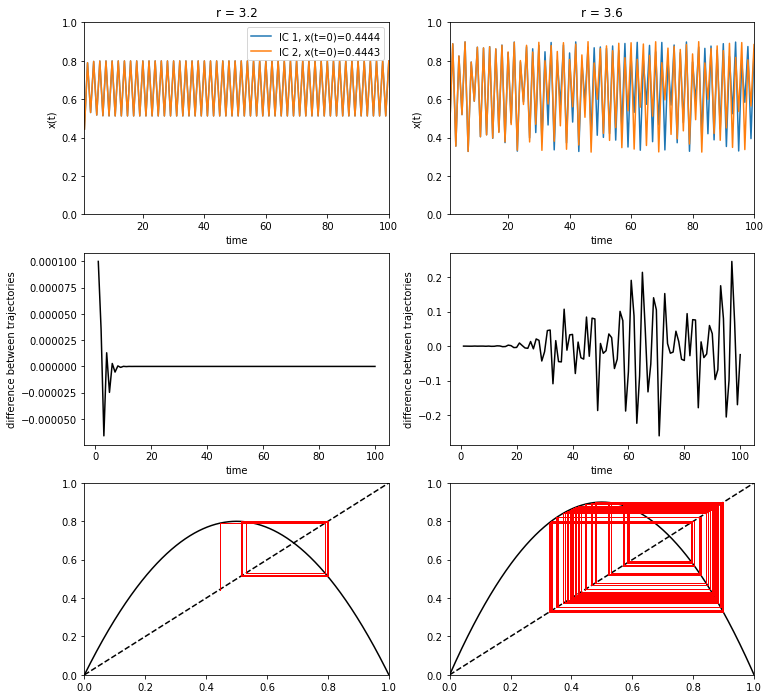

In [4]:
T = 100
x_array = np.linspace(0,1,1000)

x0_0   = 0.4444
x0_1   = 0.4443

r_0 = 3.2
r_1 = 3.6

x_t_00 = logistic_map_time(x0_0,r_0,T)
x_t_01 = logistic_map_time(x0_1,r_0,T)
x_t_10 = logistic_map_time(x0_0,r_1,T)
x_t_11 = logistic_map_time(x0_1,r_1,T)

x_t_00_x = np.zeros(2*T)
x_t_00_x[0:2*T:2] = x_t_00
x_t_00_x[1:2*T:2] = x_t_00

x_t_10_x = np.zeros(2*T)
x_t_10_x[0:2*T:2] = x_t_10
x_t_10_x[1:2*T:2] = x_t_10


fig, ax  = plt.subplots(3,2,figsize=(12,12))
ax[0,0].plot(np.linspace(1,T,T),x_t_00)
ax[0,0].plot(np.linspace(1,T,T),x_t_01)
ax[0,1].plot(np.linspace(1,T,T),x_t_10)
ax[0,1].plot(np.linspace(1,T,T),x_t_11)

ax[1,0].plot(np.linspace(1,T,T),x_t_00-x_t_01,color='black')
ax[1,1].plot(np.linspace(1,T,T),x_t_10-x_t_11,color='black')

ax[2,0].plot(x_array,r_0*x_array*(1-x_array),color='black')
ax[2,0].plot(x_array,x_array,'--',color='black')
ax[2,0].plot(x_t_00_x[0:2*T-1:1],x_t_00_x[1:2*T:1],color='red',linewidth=1)

ax[2,1].plot(x_array,r_1*x_array*(1-x_array),color='black')
ax[2,1].plot(x_array,x_array,'--',color='black')
ax[2,1].plot(x_t_10_x[0:2*T-1:1],x_t_10_x[1:2*T:1],color='red',linewidth=1)


ax[0,0].set_xlim((1,T))
ax[0,0].set_ylim((0,1))
ax[0,1].set_xlim((1,T))
ax[0,1].set_ylim((0,1))
ax[2,0].set_xlim((0,1))
ax[2,0].set_ylim((0,1))
ax[2,1].set_xlim((0,1))
ax[2,1].set_ylim((0,1))

ax[0,0].set_xlabel('time')
ax[0,1].set_xlabel('time')
ax[1,0].set_xlabel('time')
ax[1,1].set_xlabel('time')

ax[0,0].set_ylabel('x(t)')
ax[0,1].set_ylabel('x(t)')
ax[1,0].set_ylabel('difference between trajectories')
ax[1,1].set_ylabel('difference between trajectories')

ax[0,0].legend(['IC 1, x(t=0)=0.4444','IC 2, x(t=0)=0.4443'])
ax[0,0].set_title('r = '+str(r_0))
ax[0,1].set_title('r = '+str(r_1))
plt.show()

## Visualizing the effect of Initial Conditions
In the above cell we have seen that slight change in initial condition leads to a large change in ouput when **r** is greater than some value. Now lets see the effect of different initial conditions on the population. Plot the logistic map over time ($T = 20$) for different initial conditions and two different r values **$r_0 = 2.5$** and **$r_1 = 3.5$**.

In [4]:
T = 20
x_array = np.linspace(0.01,0.99,100)

r_0 = 2.5
r_1 = 3.5


# Visualizing the effect of the parameter r
Now we have seen that the initial condition doesn't affect the population over time, let's see how the population changes with different **r** values. Plot the logistic map over time ($T = 30$) with initial condition as 0.2 for different **r** values.

In [5]:
T        = 30

n_r_plot = 16
r_array  = np.linspace(0.4,4,n_r_plot)


## Plotting the Bifurcation Diagram (Period Doubling)
From the above plots, we know that initial condition doesn't affect the population and changing the paramter **r** does. Now let's plot the population after it has stabilized over different values of **r**. Compute the logistic map over time ($T = 1000$) for initial condition of 0.2 and different values of r. Let's take the population (**$x_t$**) after time 500 so that it would be stabilized. Plot the **r** values on **x-axis** and **$x_t$** on **y-axis**.

In [6]:
T        = 1000
T_start  = 500

n_r      = 2000
r_array  = np.linspace(1,8,n_r)


## Plotting the Return Map
For different r values, we have seen that $x_t$ might not settle at one value but might osciallate between multiple values. Let's plot a graph that shows the number of values **x_t** visits for different **r** values.

In [7]:
T        = 1000
T_start  = 500

n_r      = 2000
r_array  = np.linspace(1,4,n_r)


## References
* https://en.wikipedia.org/wiki/Logistic_map
* May, Robert M. (1976). "Simple mathematical models with very complicated dynamics". Nature. 261 (5560): 459–467. Bibcode:1976Natur.261..459M. Paper: [Link](https://www.nature.com/articles/261459a0)